<a href="https://colab.research.google.com/github/bhanu109/programs/blob/master/projectmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans # Required for K-Means Clustering

In [ ]:
df = pd.read_csv("/content/credit card data1.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace = True)

In [ ]:
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()), inplace = True)

In [ ]:
df = df.drop(['CUST_ID'],axis = 1)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [ ]:
tenure_distr = df.groupby("TENURE").size().sort_values(ascending = False)
tenure_distr

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

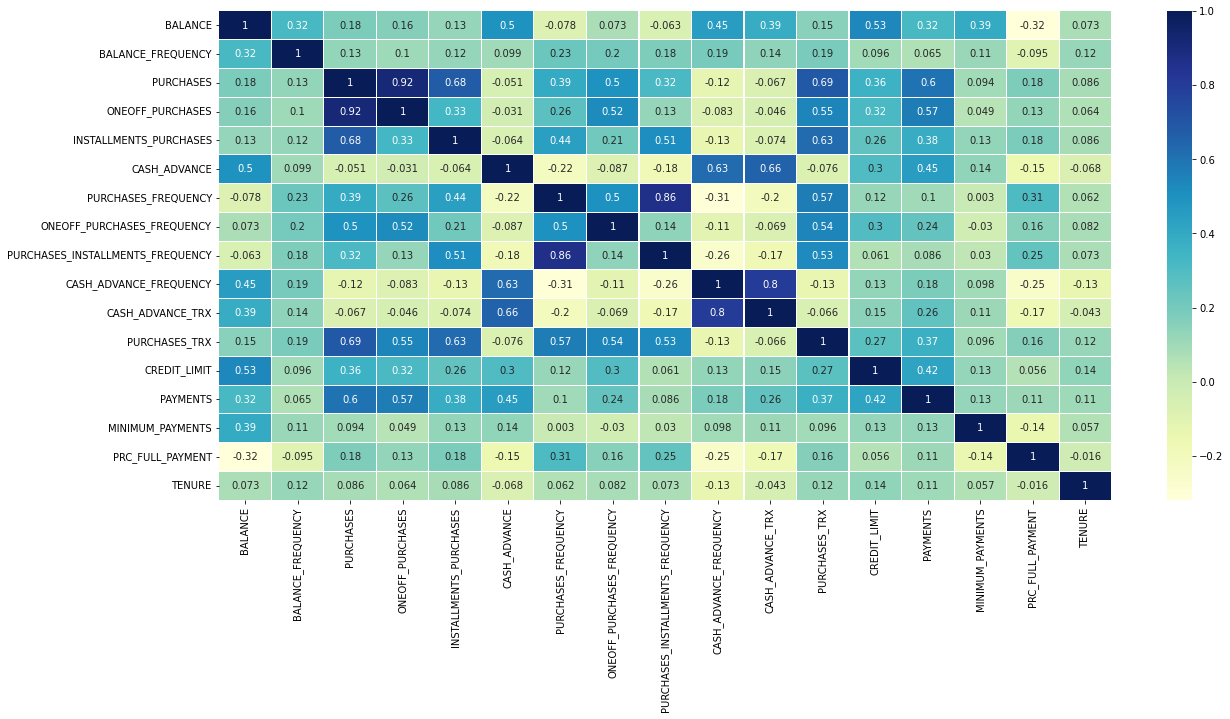

In [ ]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True) # Annot helps in putting corelation numbers in the plotted boxes

In [ ]:
X = df.iloc[:,[12,0]]
X.head()

,CREDIT_LIMIT,BALANCE
0,1000.0,40.900749
1,7000.0,3202.467416
2,7500.0,2495.148862
3,7500.0,1666.670542
4,1200.0,817.714335


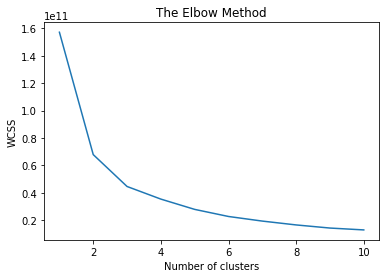

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

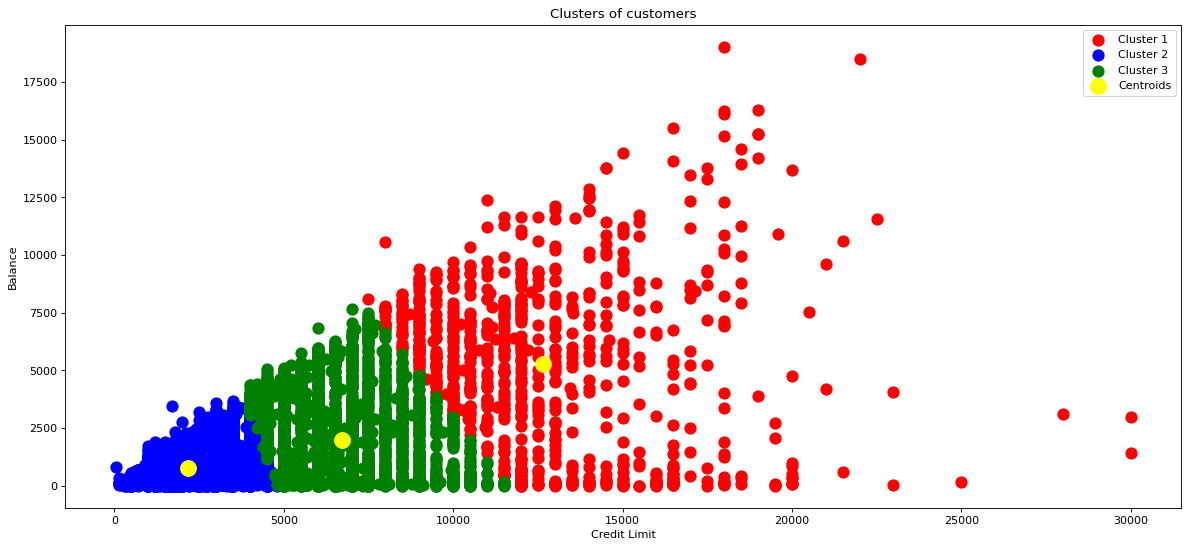

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()


 number of cluster= 2
silhouette score= 0.4560202545138331

 number of cluster= 3
silhouette score= 0.34749610863047553

 number of cluster= 4
silhouette score= 0.3385782245698667

 number of cluster= 5
silhouette score= 0.27903585965560873

 number of cluster= 6
silhouette score= 0.18853241074431362

 number of cluster= 7
silhouette score= 0.18357919996376384

 number of cluster= 8
silhouette score= 0.14981861075350797

 number of cluster= 9
silhouette score= 0.14377957331003405


Text(0.5, 1.0, 'silhouette score vs clusters')

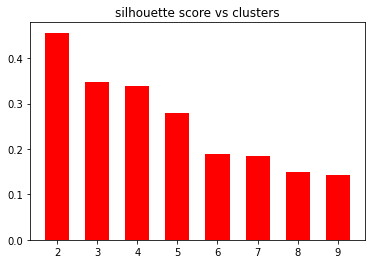

In [ ]:
scores=[]
range_values=np.arange(2,10)
for i in range_values:
  kmeans=KMeans(init='k-means++',n_clusters=i,n_init=10)
  kmeans.fit(X)
  score=metrics.silhouette_score(df,kmeans.labels_,metric='euclidean',sample_size=len(df))
  print("\n number of cluster=",i)
  print("silhouette score=",score)
  scores.append(score)
plt.figure()
plt.bar(range_values,scores,width=0.6,color='red',align='center')
plt.title('silhouette score vs clusters')

In [ ]:
X = df.iloc[:,[2,13]]
X.head()

,PURCHASES,PAYMENTS
0,95.40,201.802084
1,0.00,4103.032597
2,773.17,622.066742
3,1499.00,0.000000
4,16.00,678.334763


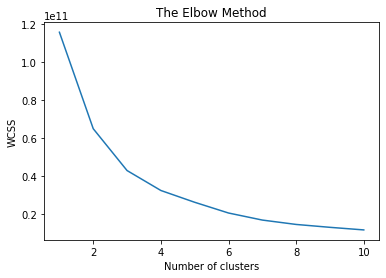

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

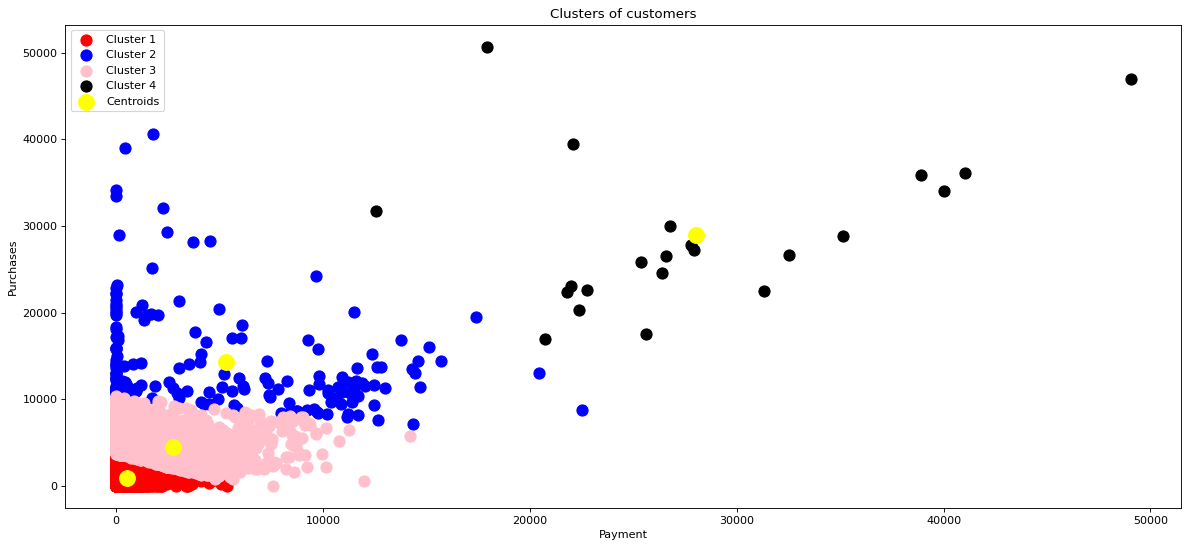

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Payment')
plt.ylabel('Purchases')
plt.legend()
plt.show()


 number of cluster= 2
silhouette score= 0.6359529002305498

 number of cluster= 3
silhouette score= 0.486969132483006

 number of cluster= 4
silhouette score= 0.3739825201466508

 number of cluster= 5
silhouette score= 0.34137842021199205

 number of cluster= 6
silhouette score= 0.2727080484618797

 number of cluster= 7
silhouette score= 0.21061024427336084

 number of cluster= 8
silhouette score= 0.19086600080968819

 number of cluster= 9
silhouette score= 0.1928357027459387


Text(0.5, 1.0, 'silhouette score vs clusters')

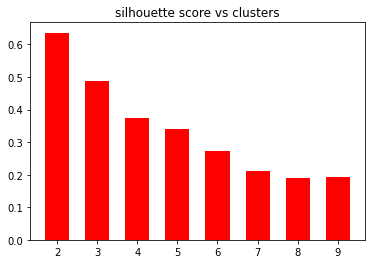

In [ ]:
scores=[]
range_values=np.arange(2,10)
for i in range_values:
  kmeans=KMeans(init='k-means++',n_clusters=i,n_init=10)
  kmeans.fit(X)
  score=metrics.silhouette_score(df,kmeans.labels_,metric='euclidean',sample_size=len(df))
  print("\n number of cluster=",i)
  print("silhouette score=",score)
  scores.append(score)
plt.figure()
plt.bar(range_values,scores,width=0.6,color='red',align='center')
plt.title('silhouette score vs clusters')

In [ ]:
km=KMeans(n_clusters=3)
clusters=km.fit_predict(df.iloc[:,1:])
df["label"]=clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


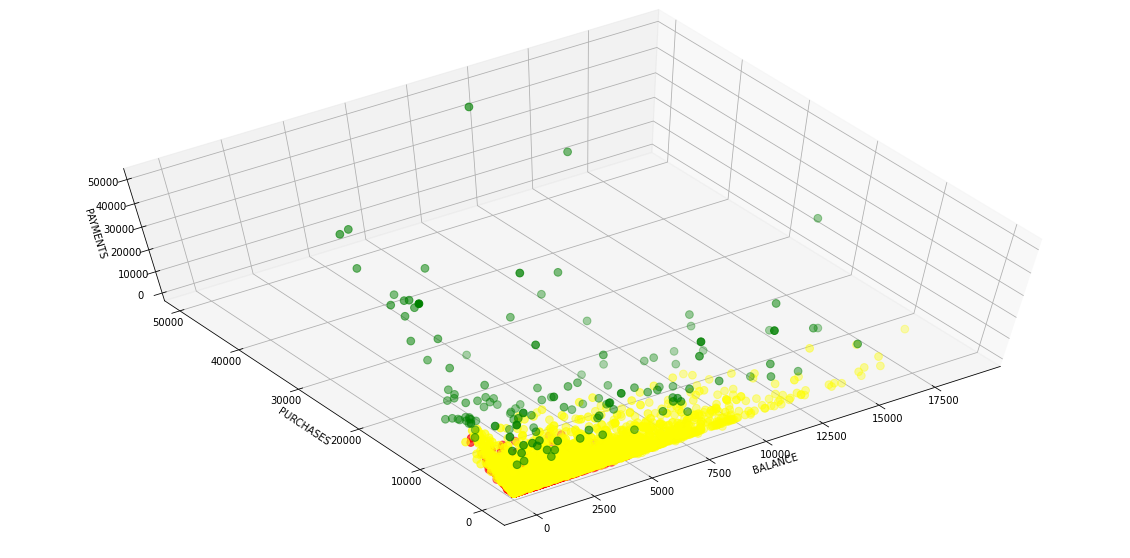

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.BALANCE[df.label==0],df["PURCHASES"][df.label==0],df["PAYMENTS"][df.label==0],c='yellow',s=60)
ax.scatter(df.BALANCE[df.label==1],df["PURCHASES"][df.label==1],df["PAYMENTS"][df.label==1],c='red',s=60)
ax.scatter(df.BALANCE[df.label==2],df["PURCHASES"][df.label==2],df["PAYMENTS"][df.label==2],c='green',s=60)


ax.view_init(65,235)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
ax.set_zlabel('PAYMENTS')
plt.show()

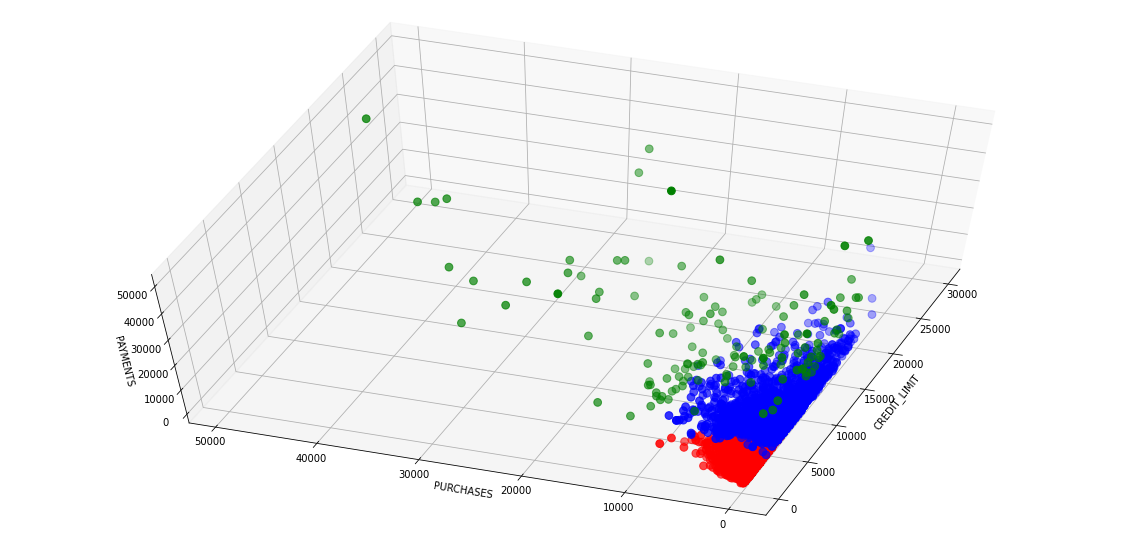

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.CREDIT_LIMIT[df.label==0],df["PURCHASES"][df.label==0],df["PAYMENTS"][df.label==0],c='blue',s=60)
ax.scatter(df.CREDIT_LIMIT[df.label==1],df["PURCHASES"][df.label==1],df["PAYMENTS"][df.label==1],c='red',s=60)
ax.scatter(df.CREDIT_LIMIT[df.label==2],df["PURCHASES"][df.label==2],df["PAYMENTS"][df.label==2],c='green',s=60)

ax.view_init(60,200)
plt.xlabel("CREDIT_LIMIT")
plt.ylabel("PURCHASES")
ax.set_zlabel('PAYMENTS')
plt.show()

In [ ]:
X = df.iloc[:,[2,4]]
X.head()

,PURCHASES,INSTALLMENTS_PURCHASES
0,95.40,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


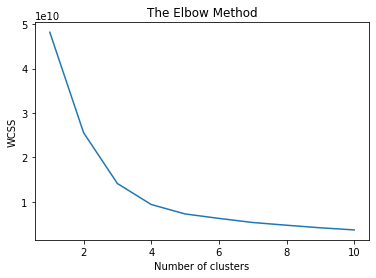

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


 number of cluster= 2
silhouette score= 0.6017911247656718

 number of cluster= 3
silhouette score= 0.4194222588409037

 number of cluster= 4
silhouette score= 0.2670853184657925

 number of cluster= 5
silhouette score= 0.139846912200274

 number of cluster= 6
silhouette score= 0.13911617852334018

 number of cluster= 7
silhouette score= 0.05572561912952949

 number of cluster= 8
silhouette score= 0.05265047169475581

 number of cluster= 9
silhouette score= 0.03889778363137732


Text(0.5, 1.0, 'silhouette score vs clusters')

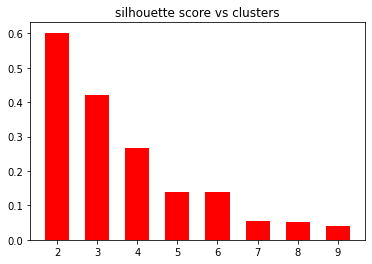

In [ ]:
scores=[]
range_values=np.arange(2,10)
for i in range_values:
  kmeans=KMeans(init='k-means++',n_clusters=i,n_init=10)
  kmeans.fit(X)
  score=metrics.silhouette_score(df,kmeans.labels_,metric='euclidean',sample_size=len(df))
  print("\n number of cluster=",i)
  print("silhouette score=",score)
  scores.append(score)
plt.figure()
plt.bar(range_values,scores,width=0.6,color='red',align='center')
plt.title('silhouette score vs clusters')

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

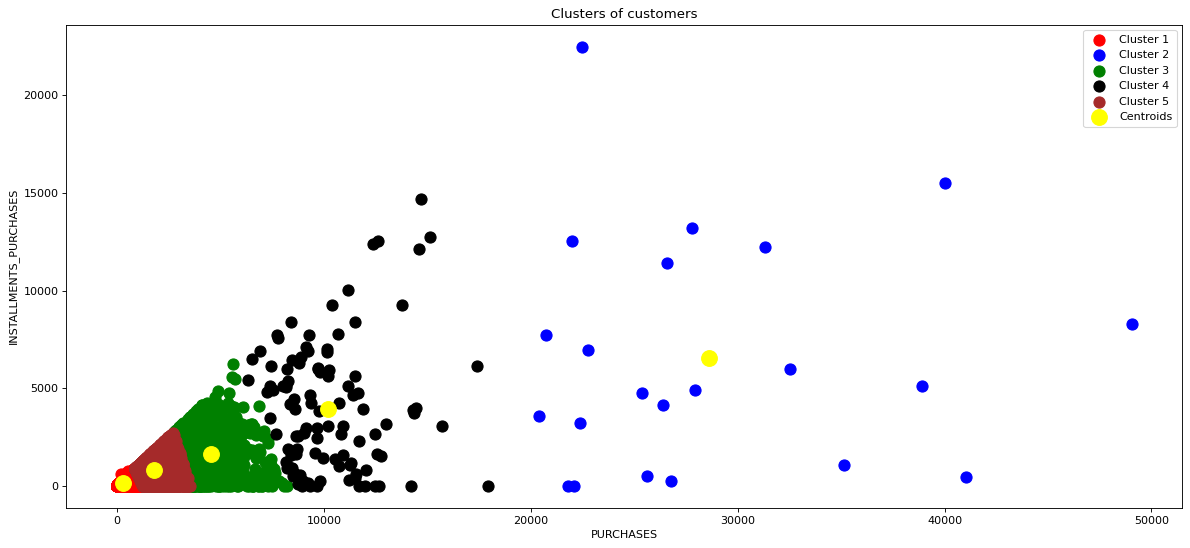

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PURCHASES')
plt.ylabel('INSTALLMENTS_PURCHASES')
plt.legend()
plt.show()